In [2]:
import torch
import cv2
import matplotlib.pyplot as plt
from segment_anything.build_sam import build_siamese_sam
from segment_anything.dataloader import MedicalDataset
from segment_anything.utils import ContrasiveStructureLoss
from torchvision.transforms import transforms

In [3]:
sliceimg = 11
num_classes = 3
device = 'cuda:2'

11
(256, 256, 3)


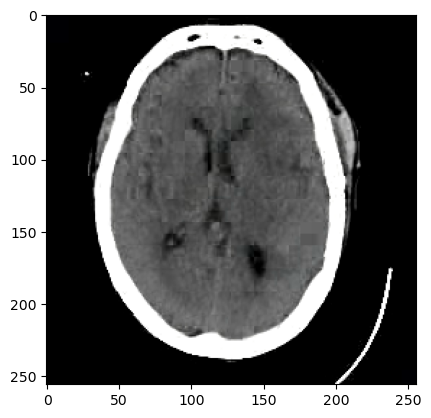

In [4]:
cap = cv2.VideoCapture('./dataset/Neoplastic_Disease/Meningioma/CT/spatial.mpg')
n = 0
while cap.isOpened():
    ret, frame = cap.read()
    n += 1
    if not ret or n == sliceimg:
        break
print(n)
CT = cap.read()[1]
plt.imshow(CT)
image = cv2.cvtColor(CT, cv2.COLOR_BGR2RGB)
print(CT.shape)

11
(256, 256, 3)


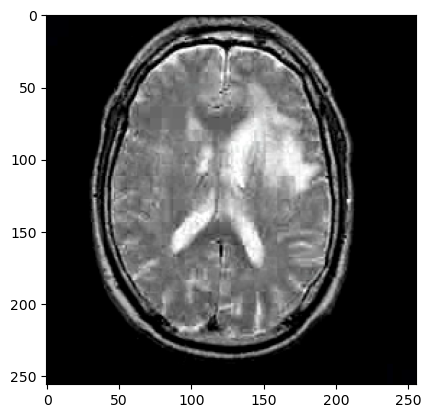

In [5]:
cap = cv2.VideoCapture('./dataset/Neoplastic_Disease/Meningioma/MR-T2/spatial.mpg')
n = 0
while cap.isOpened():
    ret, frame = cap.read()
    n += 1
    if not ret or n == sliceimg:
        break
print(n)
MRI = cap.read()[1]
plt.imshow(MRI)
image = cv2.cvtColor(MRI, cv2.COLOR_BGR2RGB)
print(MRI.shape)

In [12]:
PATH = 'model/SiameseSAM_epoch26.pth'
SiameseSAM = build_siamese_sam(num_classes=num_classes, checkpoint=PATH).to(device)
SiameseSAM.eval()

SiameseSam(
  (image_encoder): ImageEncoderViT(
    (patch_embed): PatchEmbed(
      (proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    )
    (blocks): ModuleList(
      (0-11): 12 x Block(
        (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (attn): Attention(
          (qkv): Linear(in_features=768, out_features=2304, bias=True)
          (proj): Linear(in_features=768, out_features=768, bias=True)
        )
        (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (lin1): Linear(in_features=768, out_features=3072, bias=True)
          (lin2): Linear(in_features=3072, out_features=768, bias=True)
          (act): GELU(approximate='none')
        )
      )
    )
    (neck): Sequential(
      (0): Conv2d(768, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (1): LayerNorm2d()
      (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (3): LayerNorm2d()

In [13]:
transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Resize((256, 256))
        ])
inputs = [transform(CT), transform(MRI)]
inputs = [i.to(device) for i in inputs]

In [14]:
output = SiameseSAM(inputs)

tensor([[[[ 6.0125e-02,  9.8070e-03,  7.3229e-02,  ...,  9.9736e-03,
            7.3809e-02,  5.0105e-02],
          [-4.2162e-02, -1.8124e-02,  7.8495e-02,  ..., -1.8123e-02,
            7.7968e-02, -8.6010e-02],
          [ 9.3955e-02,  4.3090e-03, -1.7288e-02,  ...,  4.9196e-03,
           -1.6670e-02,  2.3369e-02],
          ...,
          [-4.2989e-02, -1.6873e-02,  7.8337e-02,  ..., -1.7026e-02,
            7.7030e-02, -8.4979e-02],
          [ 9.3552e-02,  5.0175e-03, -1.6726e-02,  ...,  5.3174e-03,
           -1.6525e-02,  2.3092e-02],
          [-8.6434e-03, -1.6108e-02, -2.1232e-02,  ..., -1.7391e-02,
           -2.3010e-02, -6.9585e-02]],

         [[ 5.4135e-04,  2.5307e-04,  4.6392e-04,  ...,  4.0761e-04,
            3.2986e-04,  2.5286e-04],
          [ 5.0521e-04,  2.7705e-04,  3.0767e-04,  ...,  2.9578e-04,
            1.3474e-04,  3.0272e-04],
          [ 4.2639e-04,  2.4572e-04,  4.6266e-04,  ...,  3.1760e-04,
            2.5903e-04,  2.9809e-04],
          ...,
     

In [15]:
output[2].shape

torch.Size([3, 3, 256, 256])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


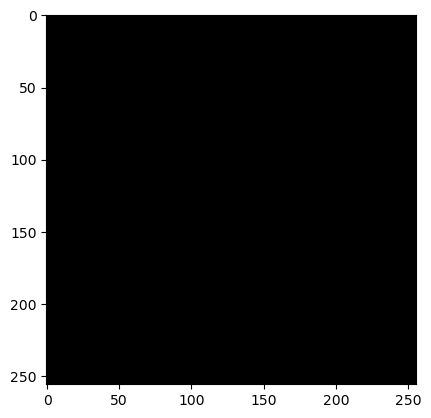

In [16]:
plt.imshow(output[2][1].detach().cpu().permute(1,2,0).numpy())

In [17]:
import torch 
a = torch.rand((16,3,256,256))
conv = torch.nn.Conv2d(3, 768, kernel_size=(16,16), stride=(16,16))
x = conv(a)
print(x)

tensor([[[[ 5.1980e-01,  4.9624e-02,  2.2196e-02,  ...,  3.2959e-01,
            3.2183e-01,  8.1622e-02],
          [ 9.3428e-02,  1.2103e-01,  1.4756e-01,  ...,  5.7624e-01,
            2.7989e-01,  1.6948e-01],
          [ 2.8334e-01,  1.3197e-01,  1.2349e-02,  ...,  2.7121e-01,
           -1.6889e-01,  1.3485e-01],
          ...,
          [ 9.7286e-02,  4.1365e-01,  1.0412e-01,  ...,  7.8262e-02,
            2.4235e-01, -4.4371e-02],
          [ 8.0387e-02, -3.6293e-02,  6.5941e-02,  ..., -1.5770e-01,
            4.5505e-02,  1.1991e-01],
          [ 3.5922e-02,  3.5457e-01, -9.3010e-02,  ...,  3.7294e-01,
            2.1302e-01, -2.2527e-03]],

         [[ 1.9232e-01, -2.4812e-02,  2.0229e-01,  ..., -9.7289e-02,
            6.1247e-03, -8.2600e-02],
          [ 9.1107e-02, -9.7470e-02,  9.1564e-02,  ...,  3.0224e-01,
            5.4280e-02, -1.2113e-01],
          [ 1.4987e-02, -1.8453e-02,  2.3604e-01,  ..., -4.8482e-02,
            7.9898e-02,  2.2387e-03],
          ...,
     